# Задача
Первая кампания проводилась в период с 5-го по 16-й день, ID участвовавших в ней пользователей содержатся в файле ids_first_company_positive.txt. Эта кампания включала в себя предоставление персональной скидки 5 000 клиентов через email-рассылку.ё
Заказчик просит вас проанализировать, насколько первая маркетинговая кампания была эффективна. Для проведения A/B-тестирования, помимо людей, которым предлагалась персональная скидка, были отобраны люди со схожими социально-демографическими признаками и покупками, которым скидку не предложили. ID этих клиентов лежат в аналогичном файле ids_first_company_negative.txt. Проведите расчёт A/B-теста и посчитайте значения основных метрик. Потом сделайте бизнес-рекомендацию и обоснуйте её.

## 1) Загрузка данных

In [1]:
from google.colab import drive #Импортируем библиотеку для работы с Google Drive
drive.mount("/content/drive") #Монтируем Google-диск. После этой операции мы можем считывать файлы со своего Google-диска.

Mounted at /content/drive


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_pos  = pd.read_csv("/content/drive/My Drive/DA Junior/FINAL/Data/df_positive.csv")

In [4]:
df_neg = pd.read_csv("/content/drive/My Drive/DA Junior/FINAL/Data/df_negative.csv")

In [5]:
df = pd.read_csv("/content/drive/My Drive/DA Junior/FINAL/Data/df_full_2.csv")
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,id,gender,age,education,city,personal_coef,cost,product_sex,base_sale,dt,categories
0,0,0.0,36,среднее,1201,0.5072,13599,0.0,1,7,bike
1,0,0.0,36,среднее,1201,0.5072,1499,2.0,0,37,hike
2,0,0.0,36,среднее,1201,0.5072,4799,2.0,0,37,hike
3,3,1.0,31,среднее,1134,0.4304,1599,1.0,0,13,shoes
4,3,1.0,31,среднее,1134,0.4304,7199,2.0,0,27,sports_goods
...,...,...,...,...,...,...,...,...,...,...,...
780112,178004,1.0,52,высшее,1188,0.4688,7999,1.0,0,12,shoes
780113,178004,1.0,52,высшее,1188,0.4688,24299,1.0,0,13,shoes
780114,178004,1.0,52,высшее,1188,0.4688,24299,1.0,0,20,shoes
780115,178004,1.0,52,высшее,1188,0.4688,12,2.0,0,20,other


In [6]:
common_ids = set(df_pos['id']).intersection(df_neg['id'])

if len(common_ids) > 0:
    print("Есть общие значения в колонке id: ", common_ids)
else:
    print("Нет общих значений в колонке id")

Есть общие значения в колонке id:  {23}


In [7]:
# Удаляю id попавшие в обе группы
df_pos = df_pos[~df_pos['id'].isin(common_ids)]
df_neg = df_neg[~df_neg['id'].isin(common_ids)]

In [8]:
positive_df = df[df['id'].apply(lambda x: x in df_pos['id'].values)]
positive_df.head()

,id,gender,age,education,city,personal_coef,cost,product_sex,base_sale,dt,categories
0,0,0.0,36,среднее,1201,0.5072,13599,0.0,1,7,bike
1,0,0.0,36,среднее,1201,0.5072,1499,2.0,0,37,hike
2,0,0.0,36,среднее,1201,0.5072,4799,2.0,0,37,hike
7,4,0.0,35,среднее,1134,0.5072,9199,2.0,0,0,sports_goods
8,4,0.0,35,среднее,1134,0.5072,4999,2.0,0,0,bike
...,...,...,...,...,...,...,...,...,...,...,...
780030,177982,1.0,38,среднее,1134,0.4304,1999,2.0,0,15,headdress
780031,177982,1.0,38,среднее,1134,0.4304,3999,1.0,0,15,wear
780032,177982,1.0,38,среднее,1134,0.4304,2999,2.0,0,34,hike
780033,177982,1.0,38,среднее,1134,0.4304,699,2.0,0,34,bags


In [9]:
# Оставляю строки, где колонка "dt" содержит значения от 5 до 16 (включительно)
positive_df_filtered = positive_df[(positive_df['dt'] >= 5) & (positive_df['dt'] <= 16)]

# Группирую данные по "id", выполняю агрегацию
positive_df_grouped = positive_df_filtered.groupby('id').agg(
    total_cost=('cost', 'sum'),
    number_of_purchases=('id', 'count'),
    AOV=('cost', 'mean'),
    main_category=('categories', lambda x: x.mode()[0]),
).reset_index()

In [10]:
positive_df_grouped

,id,total_cost,number_of_purchases,AOV,main_category
0,0,13599,1,13599.000000,bike
1,6,17215,5,3443.000000,shoes
2,9,40198,2,20099.000000,bike
3,13,44294,6,7382.333333,shoes
4,18,30754,6,5125.666667,outerwear
...,...,...,...,...,...
4769,177918,7346,4,1836.500000,wear
4770,177924,8996,4,2249.000000,bags
4771,177946,36606,4,9151.500000,bags
4772,177965,22093,7,3156.142857,wear


In [11]:
negative_df = df[df['id'].apply(lambda x: x in df_neg['id'].values)]
negative_df.head()

,id,gender,age,education,city,personal_coef,cost,product_sex,base_sale,dt,categories
297,70,0.0,31,высшее,1185,0.5584,7399,1.0,0,4,shoes
298,70,0.0,31,высшее,1185,0.5584,3999,0.0,0,5,shoes
299,70,0.0,31,высшее,1185,0.5584,5999,1.0,0,16,shoes
300,70,0.0,31,высшее,1185,0.5584,799,0.0,1,38,wear
306,75,0.0,43,среднее,1161,0.5072,4499,0.0,0,15,wear
...,...,...,...,...,...,...,...,...,...,...,...
779969,177967,1.0,27,высшее,1178,0.4688,4299,2.0,0,16,bike
779970,177967,1.0,27,высшее,1178,0.4688,1799,2.0,0,16,bike
779971,177967,1.0,27,высшее,1178,0.4688,2999,2.0,0,17,other
779972,177967,1.0,27,высшее,1178,0.4688,3999,2.0,0,17,bike


In [12]:
# Оставляю строки, где колонка "dt" содержит значения от 5 до 16 (включительно)
negative_df_filtered = negative_df[(negative_df['dt'] >= 5) & (negative_df['dt'] <= 16)]

# Группирую данные по "id", выполняю агрегацию
negative_df_grouped = negative_df_filtered.groupby('id').agg(
    total_cost=('cost', 'sum'),
    number_of_purchases=('id', 'count'),
    AOV=('cost', 'mean'),
    main_category=('categories', lambda x: x.mode()[0])
).reset_index()
# Считаю средний чек по id


In [83]:
negative_df_grouped.head()

,id,total_cost,number_of_purchases,AOV,main_category
0,70,9998,2,4999.000000,shoes
1,75,6498,2,3249.000000,wear
2,168,23006,4,5751.500000,wear
3,205,16097,3,5365.666667,outerwear
4,351,10717,3,3572.333333,bags


##2)Расчет основных метрик и визуализация

In [14]:
revenue_per_id_negative = (negative_df_grouped['total_cost'].mean()).round(2)
num_of_purchases_negative = negative_df_grouped['number_of_purchases'].sum()
total_revenue_negative = negative_df_grouped['total_cost'].sum()
AOV_negative = (total_revenue_negative / num_of_purchases_negative).round(2)
print('Средняя выручка по id_negative=', revenue_per_id_negative,
      'Количество покупок negative=', num_of_purchases_negative,
      'итоговая выручка negative=', total_revenue_negative,
      'AOV_negative', AOV_negative)

revenue_per_id_positive = (positive_df_grouped['total_cost'].mean()).round(2)
num_of_purchases_positive = positive_df_grouped['number_of_purchases'].sum()
total_revenue_positive = positive_df_grouped['total_cost'].sum()
AOV_positive = (total_revenue_positive / num_of_purchases_positive).round(2)
print('Средняя выручка по id_positive=', revenue_per_id_positive,
      'Количество покупок positive=', num_of_purchases_positive,
      'итоговая выручка positive=', total_revenue_positive,
      'AOV_positive', AOV_positive)

Средняя выручка по id_negative= 22458.32 Количество покупок negative= 19910 итоговая выручка negative= 111325883 AOV_negative 5591.46
Средняя выручка по id_positive= 27784.42 Количество покупок positive= 24975 итоговая выручка positive= 132642809 AOV_positive 5311.02


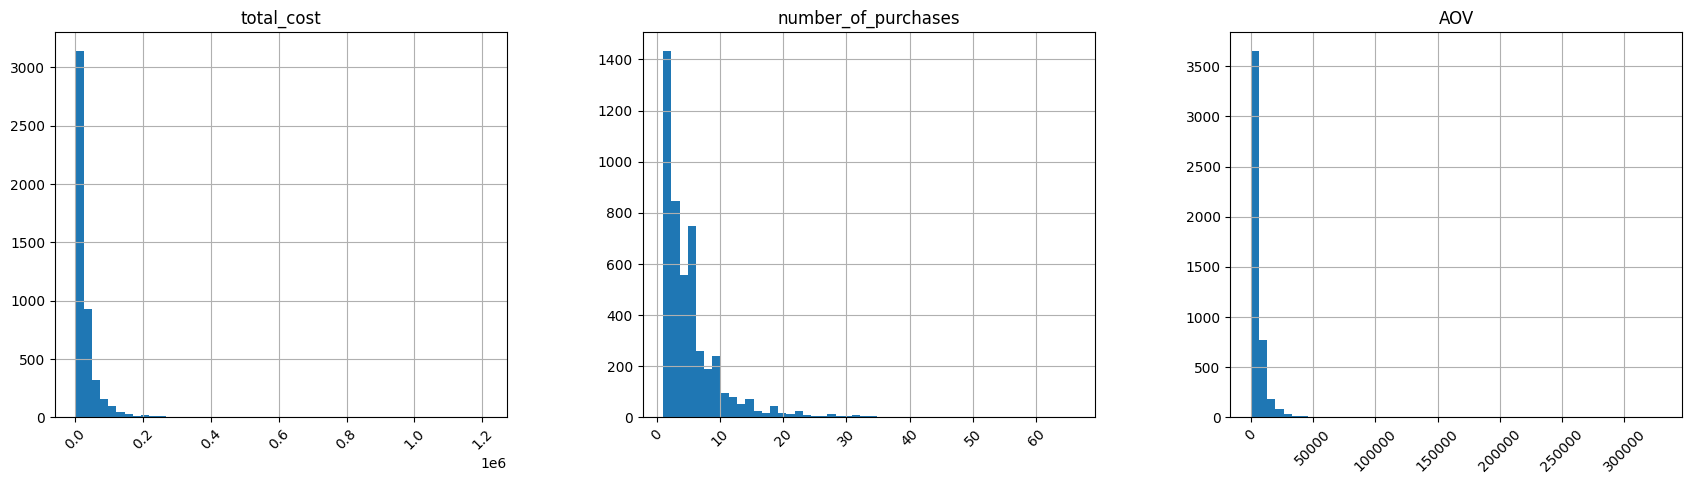

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(21, 5))

positive_df_grouped.drop(columns='id').hist(ax=axes, bins=50)

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.show()

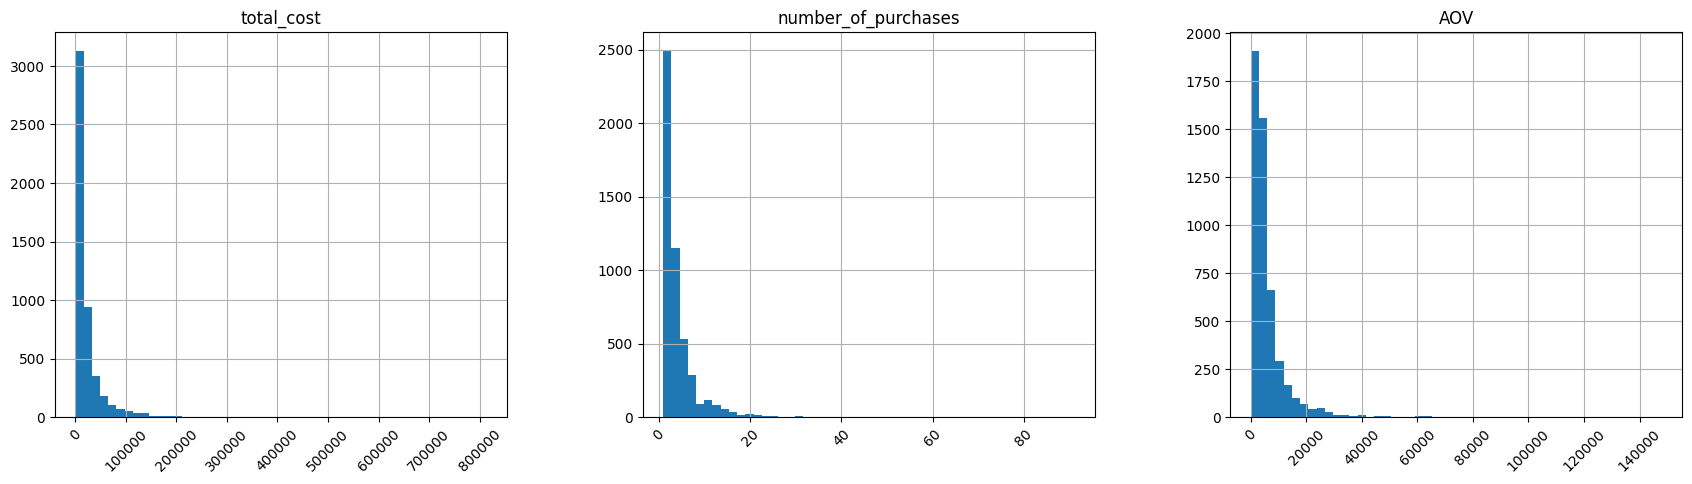

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(21, 5))

negative_df_grouped.drop(columns='id').hist(ax=axes, bins=50)

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.show()

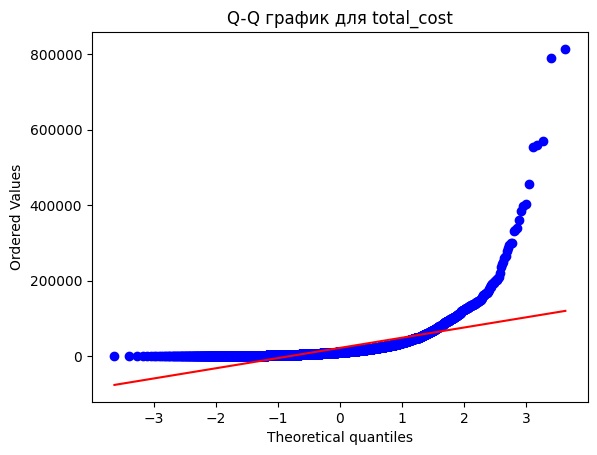

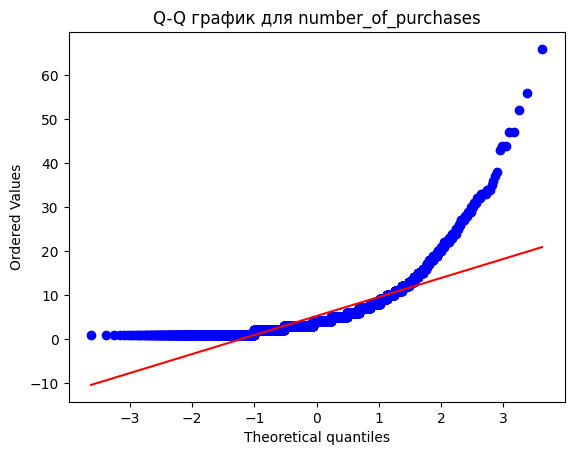

In [17]:
import pylab
import scipy.stats as stats

stats.probplot(negative_df_grouped['total_cost'], dist="norm", plot=pylab)
pylab.title('Q-Q график для total_cost')
pylab.show()

stats.probplot(positive_df_grouped['number_of_purchases'], dist="norm", plot=pylab)
pylab.title('Q-Q график для number_of_purchases')
pylab.show()


### Распределения в обоих выборках не являются нормальными

##3)Расчет минимально-детектируемого эффекта и определение типа распределения

In [18]:
# Рассчитаю минимальный эффект, который можно обнаружить
import statsmodels.stats.api as sms

# Заданные параметры
sample_size_A = len(negative_df_grouped)
sample_size_B = len(positive_df_grouped)
alpha = 0.05

# Вычисление минимального обнаружимого эффекта
effect_size = sms.tt_ind_solve_power(
    effect_size=None,
    nobs1=sample_size_A,
    alpha=alpha,
    power=0.8,
    ratio=sample_size_B/sample_size_A,
    alternative='two-sided'
)

print('минимальный детектируемый эффект =', effect_size*100, '%')

минимальный детектируемый эффект = 5.681649278178032 %


  1 / 106: ksone
  2 / 106: kstwo
  3 / 106: kstwobign
  4 / 106: norm
  5 / 106: alpha
  6 / 106: anglit
  7 / 106: arcsine
  8 / 106: beta
  9 / 106: betaprime
 10 / 106: bradford
 11 / 106: burr
 12 / 106: burr12
 13 / 106: fisk
 14 / 106: cauchy
 15 / 106: chi
 16 / 106: chi2
 17 / 106: cosine
 18 / 106: dgamma
 19 / 106: dweibull
 20 / 106: expon
 21 / 106: exponnorm
 22 / 106: exponweib
 23 / 106: exponpow
 24 / 106: fatiguelife
 25 / 106: foldcauchy
 26 / 106: f
 27 / 106: foldnorm
 28 / 106: weibull_min
 29 / 106: truncweibull_min
 30 / 106: weibull_max
 31 / 106: genlogistic
 32 / 106: genpareto
 33 / 106: genexpon
 34 / 106: genextreme
 35 / 106: gamma
 36 / 106: erlang
 37 / 106: gengamma
 38 / 106: genhalflogistic
 39 / 106: genhyperbolic
 40 / 106: gompertz
 41 / 106: gumbel_r
 42 / 106: gumbel_l
 43 / 106: halfcauchy
 44 / 106: halflogistic
 45 / 106: halfnorm
 46 / 106: hypsecant
 47 / 106: gausshyper
 48 / 106: invgamma
 49 / 106: invgauss
 50 / 106: geninvgauss
 51 / 1

Text(0, 0.5, 'Frequency')

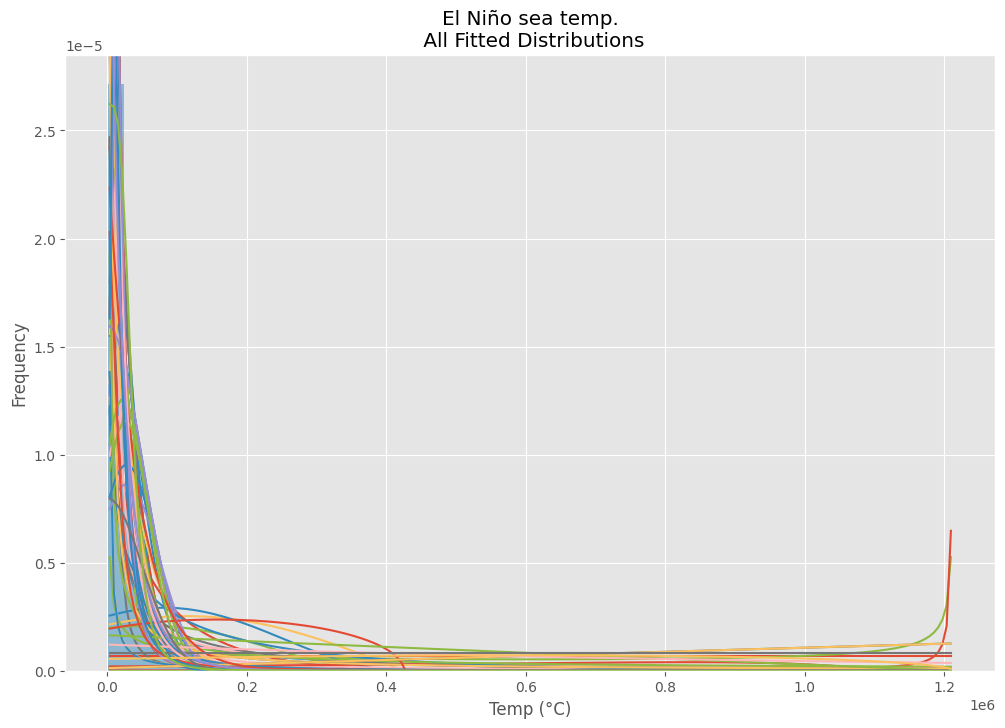

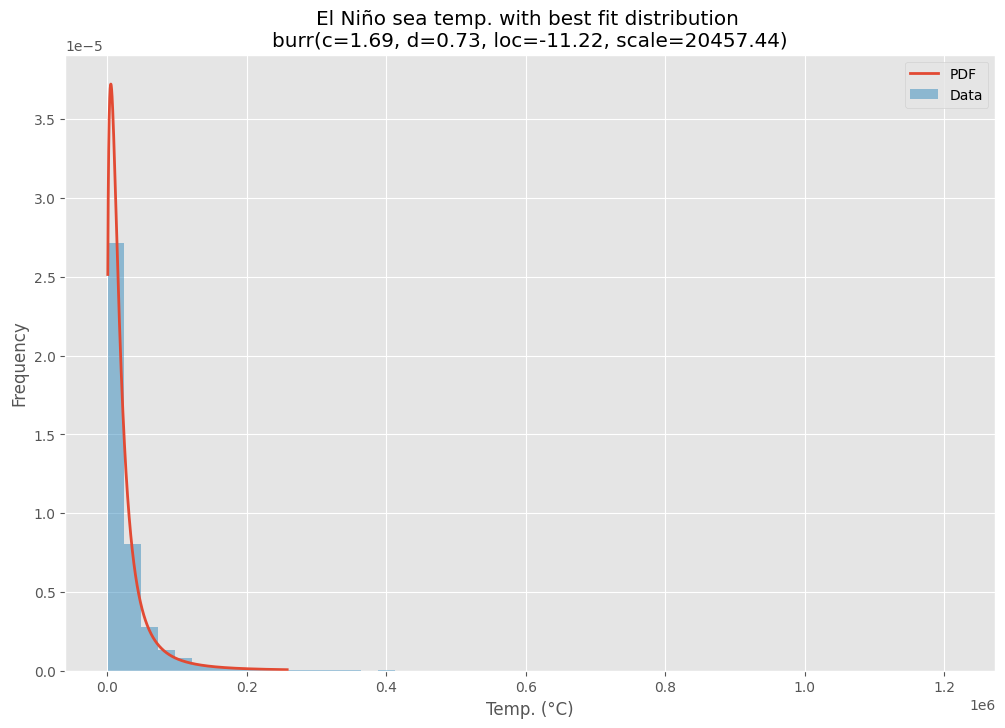

In [19]:
# Функции для определения типа распределения
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = positive_df_grouped['total_cost']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [20]:
t = pd.DataFrame(best_distibutions).sort_values(2)

In [21]:
print('Распределение negative_df_grouped[\'total_cost\'] - ', t[0][0])

Распределение negative_df_grouped['total_cost'] -  <scipy.stats._continuous_distns.burr_gen object at 0x7a88491660e0>


Распределение выборок - burr_gen

##4)Проверка Гипотезы

H0: Нет статистически значимой разницы между выручкой в обеих группах

H1: Выручка в обеих группах отличается статистически значимо

Уровень значимости возьму стандартный - 0.05

A - negative_df_grouped, т.е. выборка, которой НЕ предлагали скидку

B - posittive_df_grouped, т.е. выборка, которой предлагали скидку

In [72]:
from scipy.stats import levene
# проверяем равенство дисперсий
variance_a = np.var(negative_df_grouped['total_cost'])
variance_b = np.var(positive_df_grouped['total_cost'])
print(variance_a, variance_b)

levene_test_statistic, levene_test_pvalue = levene(negative_df_grouped['total_cost'],
                                                   positive_df_grouped['total_cost'])

print(f"Тест Левена: статистика = {levene_test_statistic}, p-значение = {levene_test_pvalue}")
if levene_test_pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: дисперсии не равны.")
else:
    print("Не отвергаем нулевую гипотезу: нет оснований считать дисперсии различными.")

1534801581.9106917 1728674952.1170888
Тест Левена: статистика = 16.082860237119483, p-значение = 6.108357931458015e-05
Отвергаем нулевую гипотезу: дисперсии не равны.


In [54]:
# Непараметрический тест Колмогорова
import numpy as np
from scipy.stats import burr

sample_a = negative_df_grouped['total_cost']
sample_b = positive_df_grouped['total_cost']

# Проведение статистического теста (Колмогорова-Смирнова)
from scipy.stats import ks_2samp
statistic, p_value = ks_2samp(sample_a, sample_b)

# Вывод результатов
print(f"Статистика теста: {statistic}, p-значение: {p_value}")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: можно сделать вывод о статистически значимых различиях между двумя выборками по выручке.")
else:
    print("Не отвергаем нулевую гипотезу: нет оснований считать различиях между двумя выборками по выручке значимыми.")

Статистика теста: 0.12486681649872185, p-значение: 1.711593661672928e-33
Отвергаем нулевую гипотезу: можно сделать вывод о статистически значимых различиях между двумя выборками по выручке.


In [55]:
# T-критерий Стьюдента
import numpy as np
from scipy import stats

sample_a = negative_df_grouped['total_cost']
sample_b = positive_df_grouped['total_cost']

# Проведение t-теста для сравнения средних
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b, equal_var=False)

# Вывод результатов
print(f"Значение t-статистики: {t_statistic}, p-значение: {p_value}")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: можно сделать вывод о статистически значимых различиях между двумя выборками по выручке.")
else:
    print("Не отвергаем нулевую гипотезу: нет оснований считать различиях между двумя выборками по выручке значимыми.")

Значение t-статистики: -6.497836292605437, p-значение: 8.551293644313342e-11
Отвергаем нулевую гипотезу: можно сделать вывод о статистически значимых различиях между двумя выборками по выручке.


In [56]:
# Проведение Z-теста
z_statistic, p_value = sm.stats.ztest(sample_a, sample_b)

# Вывод результатов
print(f"Значение Z-статистики: {z_statistic}, p-значение: {p_value}")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: можно сделать вывод о статистически значимых различиях между двумя выборками по выручке.")
else:
    print("Не отвергаем нулевую гипотезу: нет оснований считать различиях между двумя выборками по выручке значимыми.")

Значение Z-статистики: -6.5051009602043735, p-значение: 7.764121775134812e-11
Отвергаем нулевую гипотезу: можно сделать вывод о статистически значимых различиях между двумя выборками по выручке.


### логарифмирование

In [29]:
import numpy as np

# Логарифмирование данных
log_data_a = np.log(sample_a)
log_data_b = np.log(sample_b)

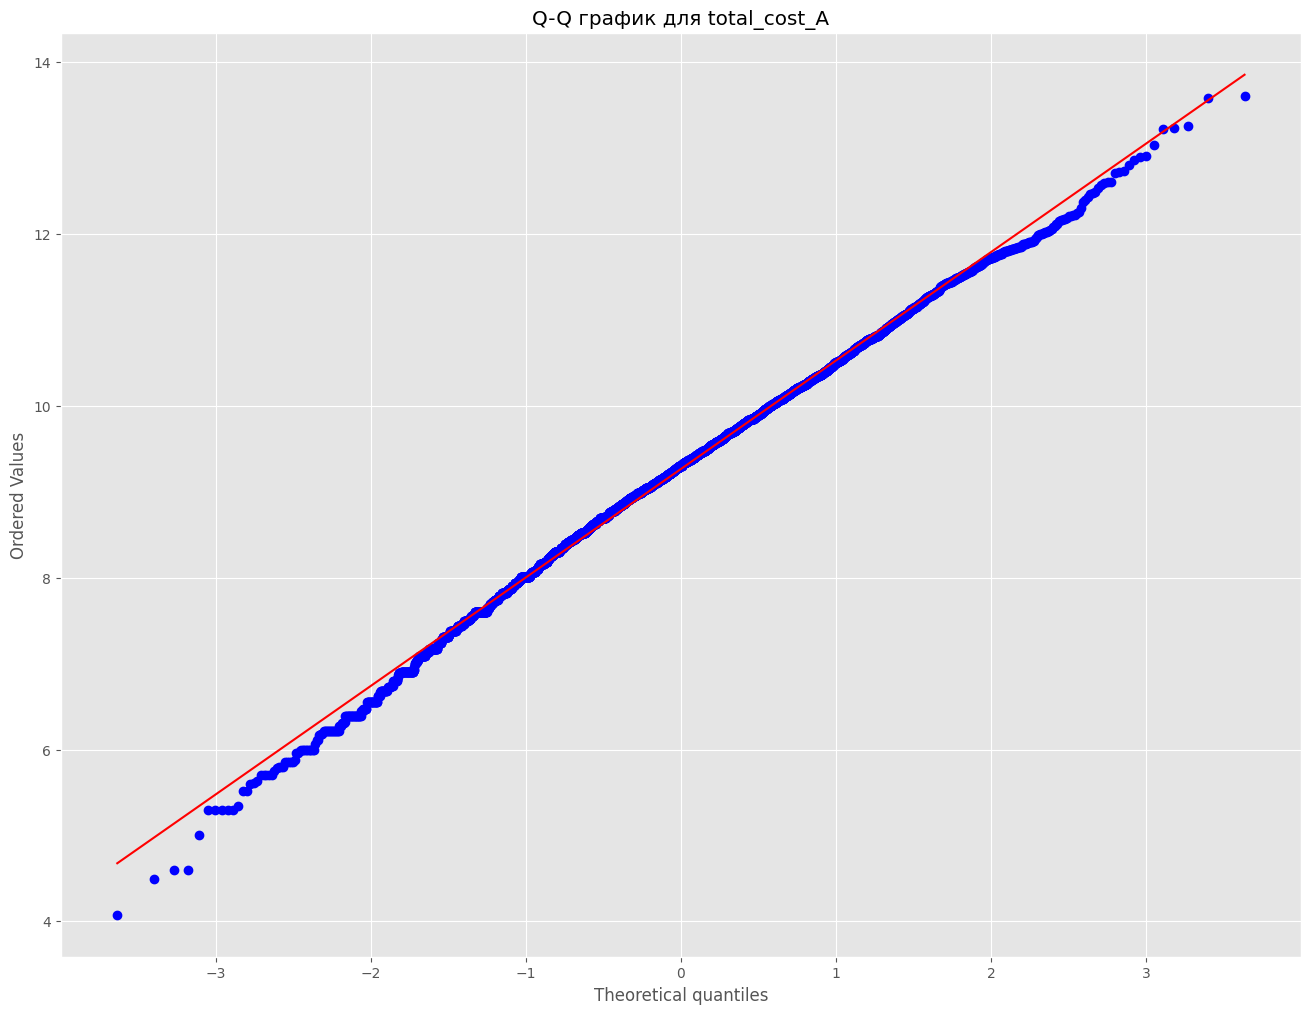

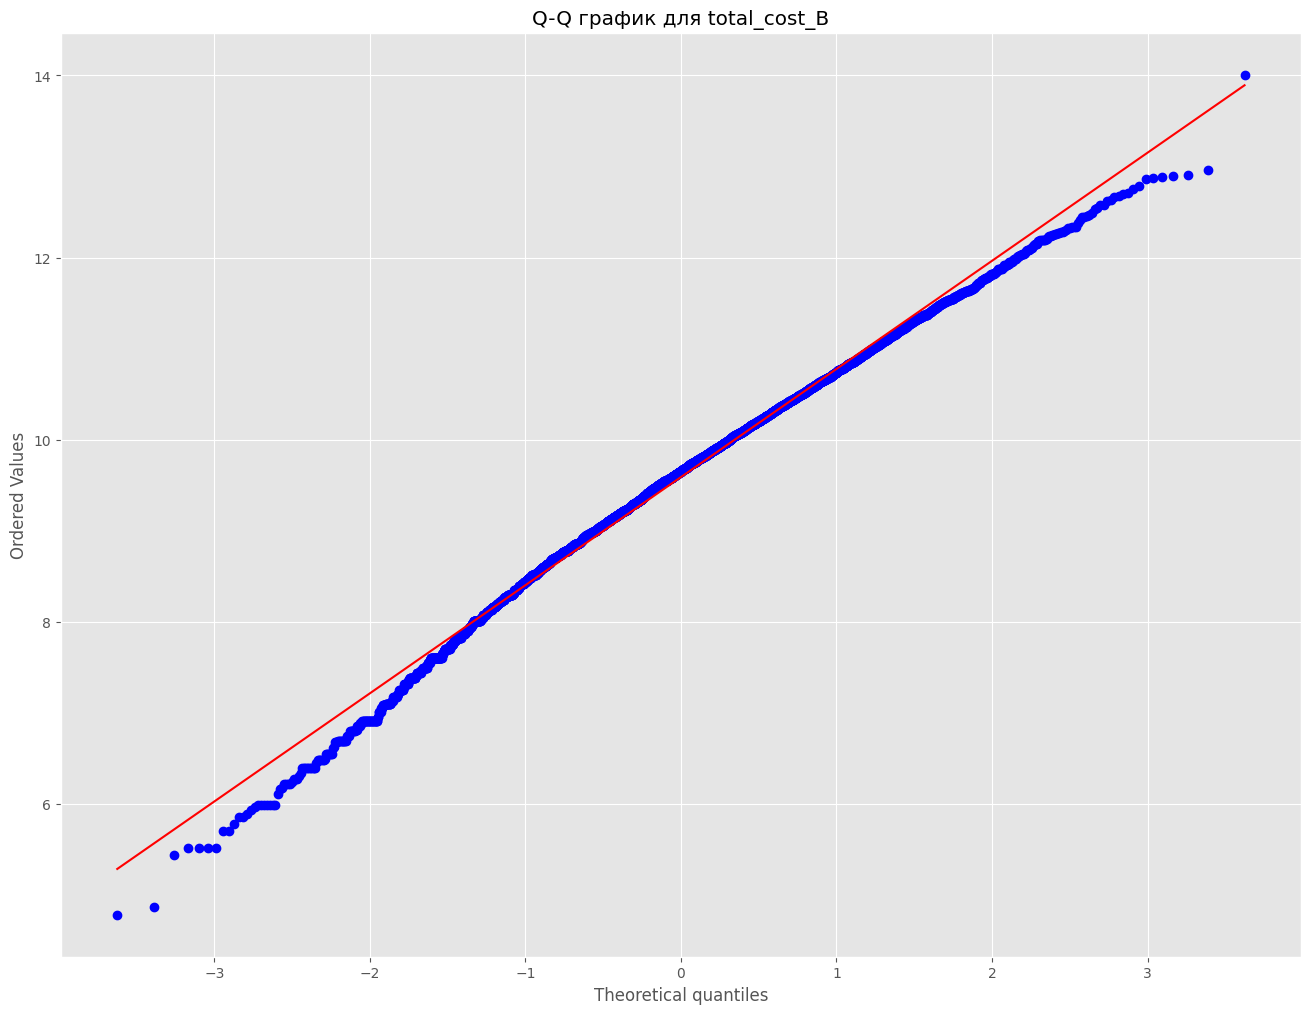

In [30]:
import pylab
import scipy.stats as stats

stats.probplot(log_data_a, dist="norm", plot=pylab)
pylab.title('Q-Q график для total_cost_A')
pylab.show()

stats.probplot(log_data_b, dist="norm", plot=pylab)
pylab.title('Q-Q график для total_cost_B')
pylab.show()



Распределения стали близки к нормальному

In [42]:
from scipy import stats

# Проведение AB-теста на логарифмированных данных
t_stat, p_value = stats.ttest_ind(log_data_a, log_data_b, equal_var=False)

# Вывод результатов
print(f"T-статистика: {t_stat}, p-значение: {p_value}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие между группами")
else:
    print("Не можем отвергнуть нулевую гипотезу: статистически значимых различий между группами не выявлено")

T-статистика: -12.936427046039421, p-значение: 5.762033952571799e-38
Отвергаем нулевую гипотезу: существует статистически значимое различие между группами


In [57]:
# U-критерий Манна-Уитни с независимыми выборками
import numpy as np
from scipy.stats import mannwhitneyu

sample_a = negative_df_grouped['total_cost']
sample_b = positive_df_grouped['total_cost']

# Проведение критерия Уилкоксона-Манна-Уитни
statistic, p_value = mannwhitneyu(sample_a, sample_b)

# Вывод результатов
print(f"Статистика U: {statistic}, p-значение: {p_value}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: можно сделать вывод о статистически значимых различиях между двумя выборками по выручке.")
else:
    print("Не отвергаем нулевую гипотезу: нет оснований считать различиях между двумя выборками по выручке значимыми.")

Статистика U: 10007791.0, p-значение: 1.2988526382072089e-39
Отвергаем нулевую гипотезу: можно сделать вывод о статистически значимых различиях между двумя выборками по выручке.


In [43]:
# нахожу параметры распределения для каждой выборки, чтобы проверить применимость тестов с помощью бутстрэпа
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize

sample_a=positive_df_grouped['total_cost']
sample_b=negative_df_grouped['total_cost']

# Определение функции потерь для оценки методом максимального правдоподобия
def loss_function(params, data):
    shape, scale = params
    return -stats.burr12(shape, scale).logpdf(data).sum()

# Начальные значения параметров формы и масштаба
initial_guess = [2, 1]  # Например, начальное предположение для параметров

# Оценка параметров методом максимального правдоподобия для выборки A
params_mle_sample_a = minimize(loss_function, initial_guess, args=(sample_a,), method='Nelder-Mead').x
print("Оценка параметров методом максимального правдоподобия для выборки A (форма, масштаб):", params_mle_sample_a)

# Оценка параметров методом максимального правдоподобия для выборки B
params_mle_sample_b = minimize(loss_function, initial_guess, args=(sample_b,), method='Nelder-Mead').x
print("Оценка параметров методом максимального правдоподобия для выборки B (форма, масштаб):", params_mle_sample_b)


Оценка параметров методом максимального правдоподобия для выборки A (форма, масштаб): [2.7370667  0.03810779]
Оценка параметров методом максимального правдоподобия для выборки B (форма, масштаб): [2.83537965 0.03806469]


##5)Проверяю с помощью Бутстрэпа, подходят ли тесты для оценки

In [67]:
# T-критерий Стьюдента
from tqdm.notebook import tqdm
result = []
for _ in tqdm(range(10000)):
    a = burr.rvs(2.7370667,  0.03810779, size=4774)
    b = burr.rvs(2.83537965, 0.03806469, size=4774)
    _, pval = stats.ttest_ind(a,b)
    result.append(pval)
t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.0528

In [68]:
# U-критерий Манна-Уитни с независимыми выборками
result = []
for _ in tqdm(range(10000)):
    a = burr.rvs(2.7370667,  0.03810779, size=4774)
    b = burr.rvs(2.83537965, 0.03806469, size=4774)
    _, pval = mannwhitneyu(a,b)
    result.append(pval)
t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.297

In [69]:
# Непараметрический тест Колмогорова
result = []
for _ in tqdm(range(10000)):
    a = burr.rvs(2.7370667,  0.03810779, size=4774)
    b = burr.rvs(2.83537965, 0.03806469, size=4774)
    _, pval = ks_2samp(a,b)
    result.append(pval)
t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.2517

In [70]:
# Проведение Z-теста
result = []
for _ in tqdm(range(10000)):
    a = burr.rvs(2.7370667,  0.03810779, size=4774)
    b = burr.rvs(2.83537965, 0.03806469, size=4774)
    _, pval = sm.stats.ztest(a,b)
    result.append(pval)
t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.0605

Непараметрический тест Колмогорова и  U-критерий Манна-Уитни с независимыми выборками не подходят для оценки имеющихся выборок.

 T-критерий Стьюдента показывает себя хорошо, не смотря на то, что выборки больше 30 наблюдений.

Z-тест наиболее применим в данной ситуации.

Не смотря на результаты Бутстрэпа, все из этих тестов показали наличие статистически значимой разницы между выборками.

##6)Выводы и рекомендации

In [71]:
# Проведение одностороннего Z-теста, для проверки гипотезы, что среднее в negative меньше
z_statistic, p_value = sm.stats.ztest(sample_a, sample_b, alternative='smaller')

# Вывод результатов
print(f"Значение Z-статистики: {z_statistic}, p-значение: {p_value}")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие между группами, причем A<B")
else:
    print("Не можем отвергнуть нулевую гипотезу: статистически значимых различий между группами не выявлено")

Значение Z-статистики: -6.5051009602043735, p-значение: 3.882060887567406e-11
Отвергаем нулевую гипотезу: существует статистически значимое различие между группами, причем A<B


In [73]:
# Метрики по группе А

revenue_per_id_negative = (negative_df_grouped['total_cost'].mean()).round(2)
num_of_purchases_negative = negative_df_grouped['number_of_purchases'].sum()
total_revenue_negative = negative_df_grouped['total_cost'].sum()
AOV_negative = (total_revenue_negative / num_of_purchases_negative).round(2)
print('Средняя выручка по A=', revenue_per_id_negative,
      'Количество покупок A=', num_of_purchases_negative,
      'Итоговая выручка A=', total_revenue_negative,
      'Средний чек А', AOV_negative)

# Метрики по группе В

revenue_per_id_positive = (positive_df_grouped['total_cost'].mean()).round(2)
num_of_purchases_positive = positive_df_grouped['number_of_purchases'].sum()
total_revenue_positive = positive_df_grouped['total_cost'].sum()
AOV_positive = (total_revenue_positive / num_of_purchases_positive).round(2)
print('Средняя выручка по В=', revenue_per_id_positive,
      'Количество покупок В=', num_of_purchases_positive,
      'Итоговая выручка В=', total_revenue_positive,
      'Средний чек В', AOV_positive)

Средняя выручка по A= 22458.32 Количество покупок A= 19910 Итоговая выручка A= 111325883 Средний чек А 5591.46
Средняя выручка по В= 27784.42 Количество покупок В= 24975 Итоговая выручка В= 132642809 Средний чек В 5311.02


ВЫВОДЫ

1)В ходе анализа были отобраны данные о покупках клиентов с 5 по 16 число по 2м группам. Группе А -  скидка не предоставлялась. Группа В - получила рассылку с предложением скидки.

2)Распределение выручки по обеим группам не является номральным, но количество наблюдений достаточно велико и явно больше 30, поэтому в исследовании применялись как параметрические методы(на основе ЦПТ), так и непараметрические методы и логарифмирование.

3)Для проверки актуальности использования критериев был проведен Бутстрэп, в результате которого, было видно, что Непараметрический тест Колмогорова и U-критерий Манна-Уитни с независимыми выборками не подходят для оценки имеющихся выборок.

4)Максимальный эффект, который можно было обнаружить исходя их количества наблюдений - 5.681649278178032 %

5)Все тесты показали, что можно сделать вывод о статистически значимых различиях между двумя выборками по выручке, на уровне значимости 0.05 и даже на уровне значимости 0.001.

6)Так же пот результатам одностороннего теста, можно сделать вывод, что существует статистически значимое различие между группами, причем A<B.

7)Основные метрики по группе В так же выше, чем по группе А(кроме среднего чека, что логично, так как группа В получила скидку)


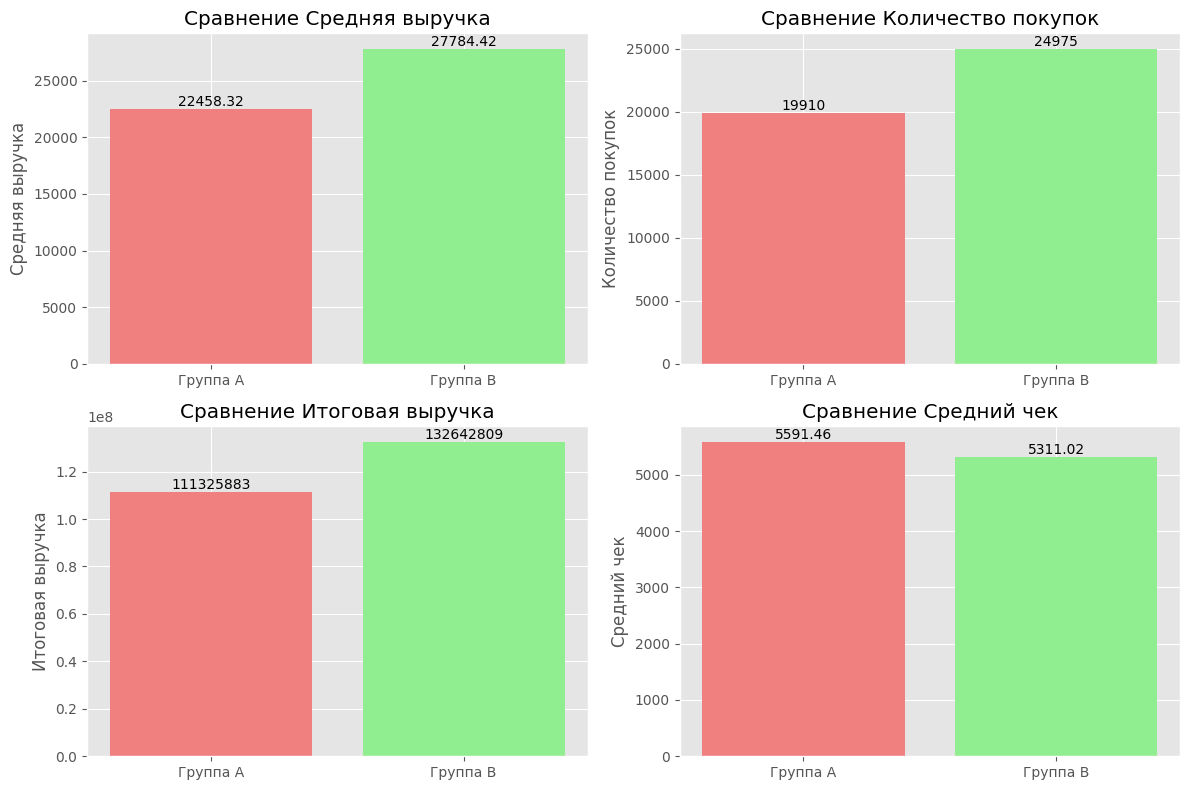

In [82]:
import matplotlib.pyplot as plt

# Создание списков с данными для группы A
data_A = [revenue_per_id_negative, num_of_purchases_negative, total_revenue_negative, AOV_negative]
labels_A = ['Средняя выручка А', 'Количество покупок А', 'Итоговая выручка А', 'Средний чек А']

# Создание списков с данными для группы B
data_B = [revenue_per_id_positive, num_of_purchases_positive, total_revenue_positive, AOV_positive]
labels_B = ['Средняя выручка В', 'Количество покупок В', 'Итоговая выручка В', 'Средний чек В']

# Создание графиков
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Графики для группы A
for i in range(4):
    bars = axs[i//2, i%2].bar(['Группа A', 'Группа B'], [data_A[i], data_B[i]], color=['lightcoral', 'lightgreen'])
    axs[i//2, i%2].set_title('Сравнение ' + labels[i])
    axs[i//2, i%2].set_ylabel(labels[i])

    # Добавление подписей значений столбцов
    for bar in bars:
        yval = bar.get_height()
        axs[i//2, i%2].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Рекомендации
Есть статистически значимые признаки того, что акция сработала и увеличилось среднее значение выручки и количества покупок благодаря проведеню акции.
Причем эффект явно больше, чем 5,68%.
Можно раскатывать данную акцию на большее количество пользователей(либо на всех), однако следует контролировать величину среднего чека и прибыли, так как средний чек стал ниже и если прибыль была низкой, то может получиться, что несмотря на увеличение выручки и количества покупок, если будет предоставлены слишком высокая скидка, то компания может сработать в минус.